Team members: Alvin Wang / Dayou Li / Tianjian Che / Xiaoyang Chi

# Import Data

## Raw Data - US CPI and commodity

In [ ]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
import datetime as dt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
% matplotlib inline

In [ ]:
# 2022.05.01
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# 2022.05.01
import os
os.chdir("/content/gdrive/MyDrive/Colab Shared Files")

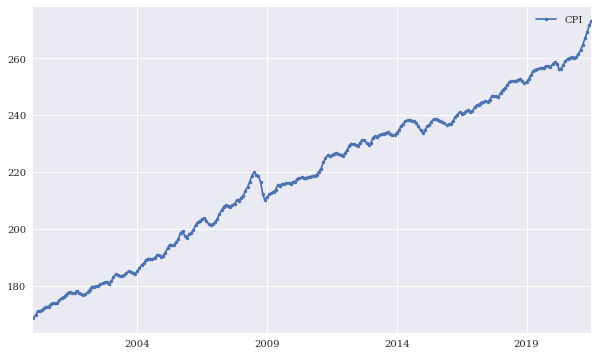

In [ ]:
inflation = pd.read_csv("US CPI.csv",index_col='Yearmon')
inflation.index.name = 'Date'
inflation.index = [dt.datetime.strptime(i[-4:]+'-'+i[3:5],"%Y-%m") for i in inflation.index]
inflation = inflation.loc['2000-01':]
inflation.plot(figsize=(10,6),marker='.');

In [ ]:
inflation['year-on-year growth rate'] = (inflation['CPI'] - inflation['CPI'].shift(12))/inflation['CPI'].shift(12)
inflation = inflation.loc['2009-01-01':]
inflation

,CPI,year-on-year growth rate
2009-01-01,211.143,0.000298
2009-02-01,212.193,0.002362
2009-03-01,212.709,-0.003836
2009-04-01,213.240,-0.007369
2009-05-01,213.856,-0.012814
...,...,...
2021-03-01,264.877,0.026198
2021-04-01,267.054,0.041597
2021-05-01,269.195,0.049927
2021-06-01,271.696,0.053915


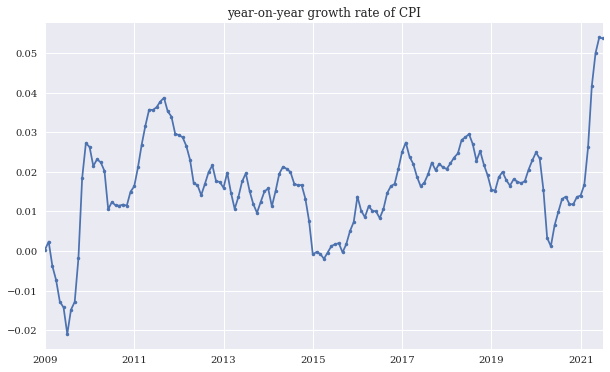

In [ ]:
inflation['year-on-year growth rate'].plot(figsize=(10,6), marker='.')
plt.title('year-on-year growth rate of CPI');

In [ ]:
commodity = pd.read_csv("commodity.csv",index_col='Date')
commodity.index = [dt.datetime.strptime(i,"%Y-%m-%d") for i in commodity.index]
commodity['Symbol'].unique()

array(['Gold', 'Palladium', 'Nickel', 'Brent Oil', 'Natural Gas',
       'US Wheat'], dtype=object)

In [ ]:
gold = commodity[commodity['Symbol'] == 'Gold']
palladium = commodity[commodity['Symbol'] == 'Palladium']
nickel = commodity[commodity['Symbol'] == 'Nickel']
brent = commodity[commodity['Symbol'] == 'Brent Oil']
ng = commodity[commodity['Symbol'] == 'Natural Gas']
wheat= commodity[commodity['Symbol'] == 'US Wheat']

In [ ]:
gold = gold.loc['2009-01-01':'2022-02-28']
palladium = palladium.loc['2009-01-01':'2022-02-28']
nickel = nickel.loc['2009-01-01':'2022-02-28']
brent = brent.loc['2009-01-01':'2022-02-28']
ng = ng.loc['2009-01-01':'2022-02-28']
wheat = wheat.loc['2009-01-01':'2022-02-28']
commodity = pd.concat([gold,palladium,nickel,brent,ng,wheat],axis=0)

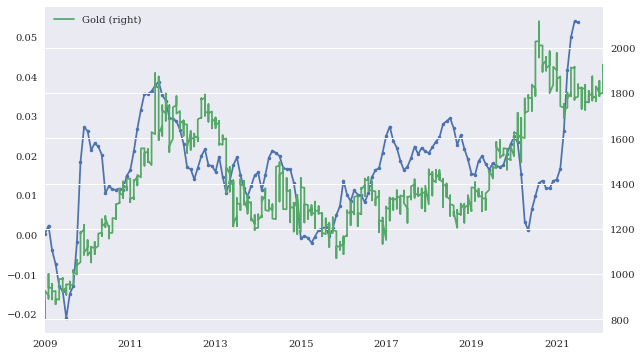

In [ ]:
plt.figure(figsize=(10,6))
inflation['year-on-year growth rate'].plot(marker='.',label='CPI')
gold['Close'].plot(secondary_y=True,label='Gold')
plt.legend(loc=0);

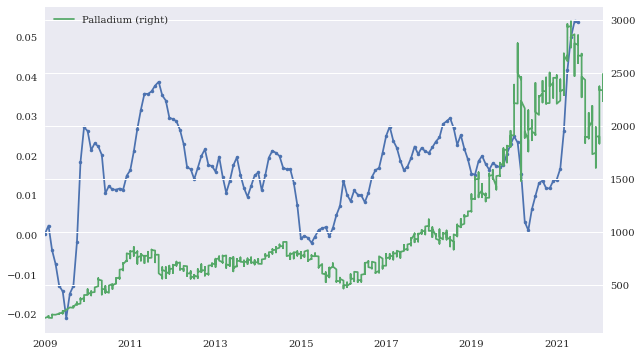

In [ ]:
plt.figure(figsize=(10,6))
inflation['year-on-year growth rate'].plot(marker='.',label='CPI')
palladium['Close'].plot(secondary_y=True,label='Palladium')
plt.legend(loc=0);

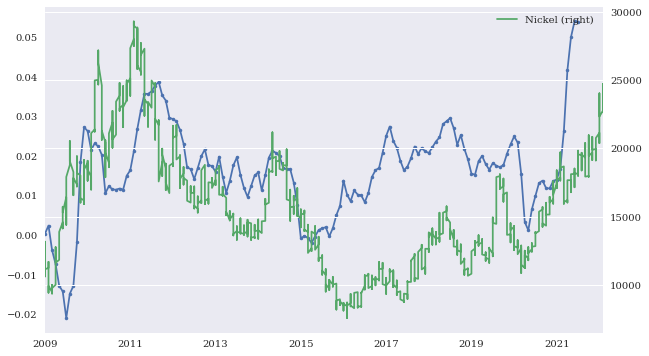

In [ ]:
plt.figure(figsize=(10,6))
inflation['year-on-year growth rate'].plot(marker='.',label='CPI')
nickel['Close'].plot(secondary_y=True,label='Nickel')
plt.legend(loc=0);

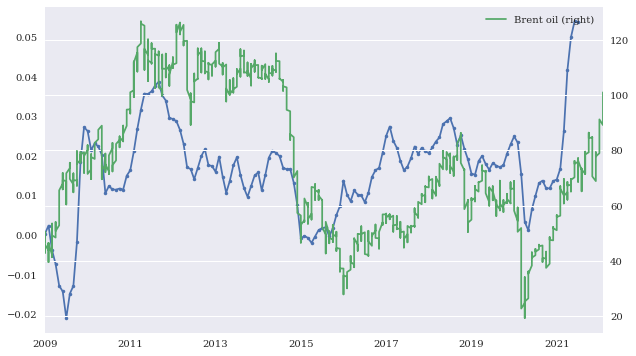

In [ ]:
plt.figure(figsize=(10,6))
inflation['year-on-year growth rate'].plot(marker='.',label='CPI')
brent['Close'].plot(secondary_y=True,label='Brent oil')
plt.legend(loc=0);

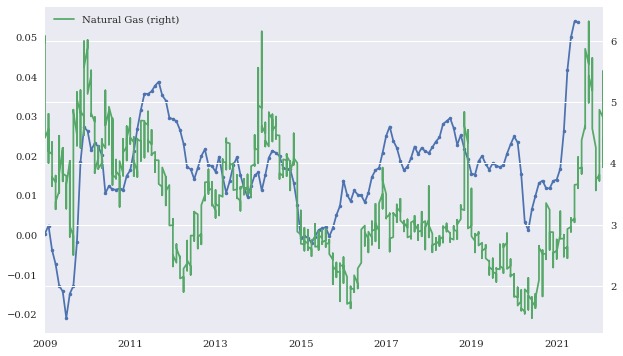

In [ ]:
plt.figure(figsize=(10,6))
inflation['year-on-year growth rate'].plot(marker='.',label='CPI')
ng['Close'].plot(secondary_y=True,label='Natural Gas')
plt.legend(loc=0);

## Mixed-Frequency DataFrame

In [ ]:
inflation

,CPI,year-on-year growth rate
2009-01-01,211.143,0.000298
2009-02-01,212.193,0.002362
2009-03-01,212.709,-0.003836
2009-04-01,213.240,-0.007369
2009-05-01,213.856,-0.012814
...,...,...
2021-03-01,264.877,0.026198
2021-04-01,267.054,0.041597
2021-05-01,269.195,0.049927
2021-06-01,271.696,0.053915


In [ ]:
for d in [gold,palladium,nickel,brent,ng,wheat]:
  symbol = d.Symbol[0]
  d.columns = [symbol+'-'+i for i in d.columns]

In [ ]:
commodity  = pd.concat([
                        gold.iloc[:,1:],
                        palladium.iloc[:,1:], 
                        nickel.iloc[:,1:], 
                        brent.iloc[:,1:],
                        ng.iloc[:,1:],
                        wheat.iloc[:,1:]],axis=1)

In [ ]:
commodity.fillna(method="ffill",inplace=True)
commodity.head()

,Gold-Open,Gold-High,Gold-Low,Gold-Close,Gold-Volume,Palladium-Open,Palladium-High,Palladium-Low,Palladium-Close,Palladium-Volume,...,Natural Gas-Open,Natural Gas-High,Natural Gas-Low,Natural Gas-Close,Natural Gas-Volume,US Wheat-Open,US Wheat-High,US Wheat-Low,US Wheat-Close,US Wheat-Volume
2009-01-02,881.5,881.5,868.9,878.8,46.0,NaN,NaN,NaN,NaN,NaN,...,5.550,6.088,5.503,5.971,41110.0,606.25,615.00,592.00,611.00,23818.0
2009-01-05,882.0,883.5,847.0,857.2,35.0,NaN,NaN,NaN,NaN,NaN,...,5.930,6.142,5.825,6.072,42385.0,613.00,619.50,596.25,616.75,24454.0
2009-01-06,855.1,867.6,840.0,865.4,113.0,190.0,192.0,190.0,192.55,2.0,...,6.083,6.240,5.865,5.983,57506.0,615.00,645.00,611.50,643.50,43517.0
2009-01-07,862.0,867.0,837.7,841.1,101.0,190.0,192.0,190.0,192.55,2.0,...,5.985,6.070,5.784,5.872,48756.0,641.50,646.25,609.50,613.25,38683.0
2009-01-08,837.9,861.0,837.9,853.9,255.0,190.0,192.0,190.0,192.55,2.0,...,5.849,6.004,5.550,5.583,74717.0,610.25,620.75,598.00,612.50,33950.0


In [ ]:
commodity.fillna(method="bfill",inplace=True)
commodity

,Gold-Open,Gold-High,Gold-Low,Gold-Close,Gold-Volume,Palladium-Open,Palladium-High,Palladium-Low,Palladium-Close,Palladium-Volume,...,Natural Gas-Open,Natural Gas-High,Natural Gas-Low,Natural Gas-Close,Natural Gas-Volume,US Wheat-Open,US Wheat-High,US Wheat-Low,US Wheat-Close,US Wheat-Volume
2009-01-02,881.5,881.5,868.9,878.8,46.0,190.00,192.00,190.00,192.55,2.0,...,5.550,6.088,5.503,5.971,41110.0,606.25,615.00,592.00,611.00,23818.0
2009-01-05,882.0,883.5,847.0,857.2,35.0,190.00,192.00,190.00,192.55,2.0,...,5.930,6.142,5.825,6.072,42385.0,613.00,619.50,596.25,616.75,24454.0
2009-01-06,855.1,867.6,840.0,865.4,113.0,190.00,192.00,190.00,192.55,2.0,...,6.083,6.240,5.865,5.983,57506.0,615.00,645.00,611.50,643.50,43517.0
2009-01-07,862.0,867.0,837.7,841.1,101.0,190.00,192.00,190.00,192.55,2.0,...,5.985,6.070,5.784,5.872,48756.0,641.50,646.25,609.50,613.25,38683.0
2009-01-08,837.9,861.0,837.9,853.9,255.0,190.00,192.00,190.00,192.55,2.0,...,5.849,6.004,5.550,5.583,74717.0,610.25,620.75,598.00,612.50,33950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-23,1901.2,1912.9,1891.1,1910.4,154843.0,2345.50,2485.50,2342.00,2484.50,0.0,...,4.504,4.704,4.452,4.623,47180.0,841.00,880.00,834.00,876.00,0.0
2022-02-24,1911.9,1976.5,1878.6,1926.3,423048.0,2482.52,2712.27,2314.02,2421.02,0.0,...,4.603,4.940,4.293,4.568,3540.0,882.75,926.00,877.25,926.00,0.0
2022-02-25,1906.5,1925.0,1884.4,1887.6,229780.0,2425.00,2482.02,2315.02,2372.50,0.0,...,4.573,4.716,4.417,4.470,114859.0,923.25,951.25,841.50,843.00,0.0
2022-02-27,1906.5,1925.0,1884.4,1887.6,229780.0,2356.00,2553.00,2356.00,2481.50,0.0,...,4.573,4.716,4.417,4.470,114859.0,923.25,951.25,841.50,843.00,0.0


In [ ]:
commodity.isna().sum()

Gold-Open             0
Gold-High             0
Gold-Low              0
Gold-Close            0
Gold-Volume           0
Palladium-Open        0
Palladium-High        0
Palladium-Low         0
Palladium-Close       0
Palladium-Volume      0
Nickel-Open           0
Nickel-High           0
Nickel-Low            0
Nickel-Close          0
Nickel-Volume         0
Brent Oil-Open        0
Brent Oil-High        0
Brent Oil-Low         0
Brent Oil-Close       0
Brent Oil-Volume      0
Natural Gas-Open      0
Natural Gas-High      0
Natural Gas-Low       0
Natural Gas-Close     0
Natural Gas-Volume    0
US Wheat-Open         0
US Wheat-High         0
US Wheat-Low          0
US Wheat-Close        0
US Wheat-Volume       0
dtype: int64

# Forecasting

## First Attempt: Simple Average and OLS

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
seg1 = '2016-12'
seg2 = '2017-01'

In [ ]:
X = commodity.groupby(pd.PeriodIndex(commodity.index, freq="M")).mean()
X

,Gold-Open,Gold-High,Gold-Low,Gold-Close,Gold-Volume,Palladium-Open,Palladium-High,Palladium-Low,Palladium-Close,Palladium-Volume,...,Natural Gas-Open,Natural Gas-High,Natural Gas-Low,Natural Gas-Close,Natural Gas-Volume,US Wheat-Open,US Wheat-High,US Wheat-Low,US Wheat-Close,US Wheat-Volume
2009-01,859.952381,868.404762,850.100000,860.500000,3725.571429,190.000000,192.000000,190.000000,192.550000,2.000000,...,5.113524,5.234286,4.941810,5.058143,51713.095238,589.869048,603.392857,576.476190,588.392857,32436.047619
2009-02,940.805000,952.760000,930.255000,942.225000,677.450000,203.250000,204.140000,202.840000,205.230000,74.850000,...,4.384200,4.495200,4.248250,4.375950,68184.100000,538.087500,545.575000,528.187500,534.562500,36779.950000
2009-03,926.672727,935.540909,916.804545,925.295455,3246.500000,203.272727,204.934091,202.588636,205.179545,34.227273,...,4.032455,4.133773,3.900818,4.002136,67018.545455,522.454545,531.034091,512.977273,521.125000,20371.636364
2009-04,893.657143,900.390476,885.014286,892.666667,814.238095,220.095238,220.095238,220.095238,223.552381,0.095238,...,3.585905,3.650667,3.480429,3.561381,54959.666667,527.095238,536.511905,519.142857,526.404762,35681.523810
2009-05,926.585714,933.147619,924.366667,931.080952,3963.714286,224.521429,225.342857,224.309524,226.130952,91.666667,...,3.907000,4.030524,3.771905,3.912476,86687.380952,580.916667,593.964286,575.178571,586.964286,23077.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10,1779.573077,1791.107692,1770.188462,1780.107692,1586.192308,2011.826923,2050.807692,1974.865385,2014.403846,0.000000,...,5.625308,5.808923,5.390308,5.549346,156461.769231,743.163462,754.288462,736.826923,746.480769,48851.769231
2021-11,1824.734615,1837.750000,1813.109615,1824.446154,4504.346154,2006.346154,2039.962308,1965.278846,1997.134615,0.000000,...,5.159615,5.325923,4.975192,5.131962,118714.653846,809.509615,820.677692,798.446154,807.990385,19353.038462
2021-12,1793.688889,1802.974074,1786.355556,1795.774074,4527.592593,1820.030000,1859.251852,1776.980000,1825.372222,0.000000,...,3.906926,4.026519,3.760852,3.859741,113500.185185,790.861111,798.207407,781.120370,789.262963,1383.814815
2022-01,1819.032692,1826.730769,1807.661538,1818.011538,76014.730769,2008.785385,2057.989231,1979.852692,2026.457692,0.000000,...,4.094846,4.279038,3.992077,4.154692,112558.769231,771.807692,780.384615,759.509615,770.144231,7131.384615


In [ ]:
X_train = X.loc['2009-01':seg1]
X_test = X.loc[seg2:]

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [ ]:
y_train = inflation['year-on-year growth rate'].iloc[1:len(X_train)+1]
y_test = inflation['year-on-year growth rate'].iloc[len(X_train)+1:]

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_train)

In [ ]:
print('MSE:', np.square(np.subtract(y_train,y_predict)).mean())

MSE: 2.9104948516751224e-05


In [ ]:
y_tpred = model.predict(X_test)

In [ ]:
y_tpred = y_tpred[-y_test.shape[0]:] # 2022.05.01
print('MSE:', np.square(np.subtract(y_test, y_tpred)).mean())

MSE: 0.00017457832179893843


In [ ]:
y_p = np.concatenate([[np.nan],y_predict, y_tpred])
inflation['g_p'] = y_p

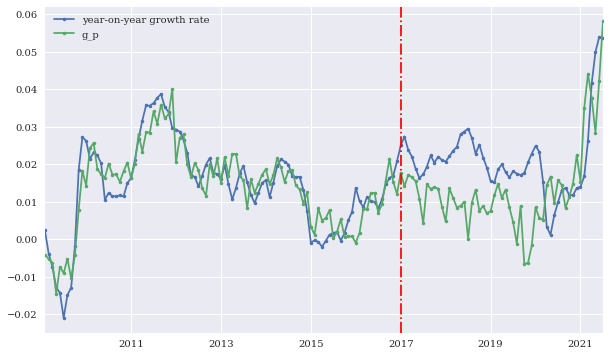

In [ ]:
inflation[['year-on-year growth rate','g_p']].loc['2009-02-01':].plot(figsize=(10,6),marker='.')
plt.axvline(seg2, color='r', linestyle='-.');

## Second Attempt: Simple Average and Penalized Regression

### Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
model = Lasso(alpha=0.001)
model.fit(X_train, y_train)
y_predict = model.predict(X_train)

In [ ]:
print('MSE:', np.square(np.subtract(y_train,y_predict)).mean())

MSE: 5.0932319589503475e-05


In [ ]:
y_tpred = model.predict(X_test)

In [ ]:
y_tpred = y_tpred[-y_test.shape[0]:] # 2022.05.01
print('MSE:', np.square(np.subtract(y_test, y_tpred)).mean())

MSE: 0.0001666762543550033


In [ ]:
y_p = np.concatenate([[np.nan],y_predict, y_tpred])
inflation['g_p'] = y_p

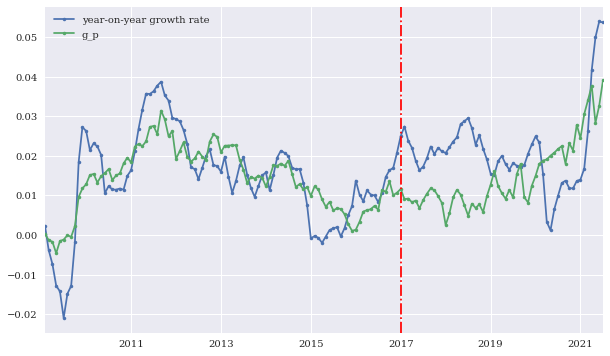

In [ ]:
inflation[['year-on-year growth rate','g_p']].loc['2009-02-01':].plot(figsize=(10,6),marker='.')
plt.axvline(seg2, color='r', linestyle='-.');

### LassoCV

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
model = LassoCV(alphas=[1e-4,1e-3,1e-2,1e-1])
model.fit(X_train, y_train)
y_predict = model.predict(X_train)

In [ ]:
print('MSE:', np.square(np.subtract(y_train,y_predict)).mean())

MSE: 5.0932319589503475e-05


In [ ]:
print('MSE:', np.square(np.subtract(y_test,y_tpred)).mean())

MSE: 0.0001666762543550033


In [ ]:
y_p = np.concatenate([[np.nan],y_predict, y_tpred])
inflation['g_p'] = y_p

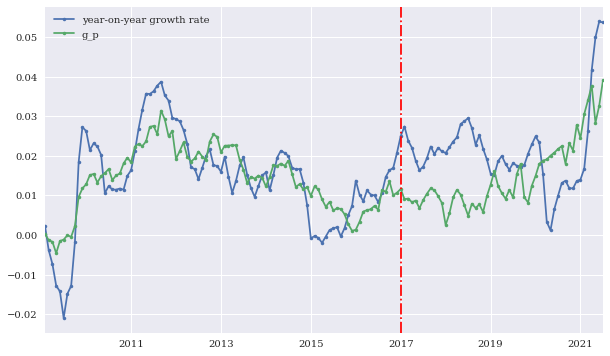

In [ ]:
inflation[['year-on-year growth rate','g_p']].loc['2009-02-01':].plot(figsize=(10,6),marker='.')
plt.axvline(seg2, color='r', linestyle='-.');

### Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model = Ridge(alpha=0.001)
model.fit(X_train, y_train)
y_predict = model.predict(X_train)

In [ ]:
print('MSE:', np.square(np.subtract(y_train,y_predict)).mean())

MSE: 3.0148834462553933e-05


In [ ]:
y_tpred = model.predict(X_test)

In [ ]:
y_tpred = y_tpred[-y_test.shape[0]:] # 2022.05.01
print('MSE:', np.square(np.subtract(y_test,y_tpred)).mean())

MSE: 0.0001678178406496832


In [ ]:
y_p = np.concatenate([[np.nan],y_predict, y_tpred])
inflation['g_p'] = y_p

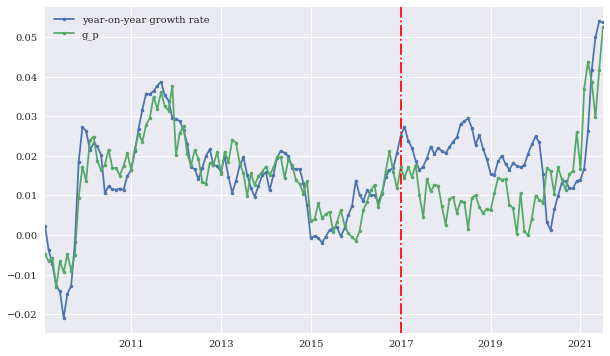

In [ ]:
inflation[['year-on-year growth rate','g_p']].loc['2009-02-01':].plot(figsize=(10,6),marker='.')
plt.axvline(seg2, color='r', linestyle='-.');

### RidgeCV

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
model = RidgeCV(alphas=[1e-4,1e-3,1e-2,1e-1])
model.fit(X_train, y_train)
y_predict = model.predict(X_train)
y_tpred = model.predict(X_test)

In [ ]:
print('MSE:', np.square(np.subtract(y_train,y_predict)).mean())

MSE: 3.68902460248577e-05


In [ ]:
y_tpred = y_tpred[-y_test.shape[0]:] # 2022.05.01
print('MSE:', np.square(np.subtract(y_test,y_tpred)).mean())

MSE: 0.0001681093680231343


In [ ]:
y_p = np.concatenate([[np.nan],y_predict, y_tpred])
inflation['g_p'] = y_p

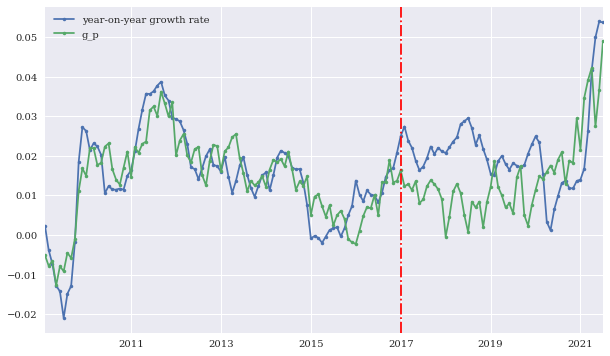

In [ ]:
inflation[['year-on-year growth rate','g_p']].loc['2009-02-01':].plot(figsize=(10,6),marker='.')
plt.axvline(seg2, color='r', linestyle='-.');

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree

In [ ]:
model = DecisionTreeRegressor(max_depth=8, random_state=123)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=123)

In [ ]:
y_predict = model.predict(X_train)
print('MSE:', np.square(np.subtract(y_train,y_predict)).mean())

MSE: 1.8067843114297657e-07


In [ ]:
y_tpred = model.predict(X_test)

In [ ]:
y_tpred = y_tpred[-y_test.shape[0]:] # 2022.05.01
print('MSE:', np.square(np.subtract(y_test,y_tpred)).mean())

MSE: 0.00017954714155981566


In [ ]:
y_p = np.concatenate([[np.nan],y_predict, y_tpred])
inflation['g_p'] = y_p

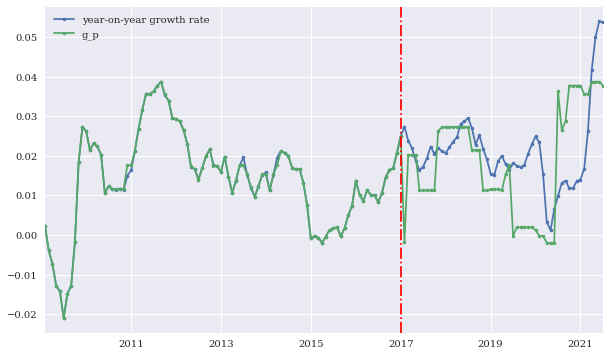

In [ ]:
inflation[['year-on-year growth rate','g_p']].loc['2009-02-01':].plot(figsize=(10,6),marker='.')
plt.axvline(seg2, color='r', linestyle='-.');

In [ ]:
print(export_text(model, feature_names=list(X.columns)))

|--- Brent Oil-Low <= -0.39
|   |--- US Wheat-High <= -0.98
|   |   |--- US Wheat-High <= -1.50
|   |   |   |--- Nickel-High <= -1.17
|   |   |   |   |--- US Wheat-High <= -1.54
|   |   |   |   |   |--- Gold-Open <= 0.08
|   |   |   |   |   |   |--- value: [0.02]
|   |   |   |   |   |--- Gold-Open >  0.08
|   |   |   |   |   |   |--- value: [0.02]
|   |   |   |   |--- US Wheat-High >  -1.54
|   |   |   |   |   |--- value: [0.01]
|   |   |   |--- Nickel-High >  -1.17
|   |   |   |   |--- US Wheat-Low <= -1.60
|   |   |   |   |   |--- value: [0.03]
|   |   |   |   |--- US Wheat-Low >  -1.60
|   |   |   |   |   |--- value: [0.02]
|   |   |--- US Wheat-High >  -1.50
|   |   |   |--- Brent Oil-Close <= -0.92
|   |   |   |   |--- Gold-Open <= -0.88
|   |   |   |   |   |--- value: [0.01]
|   |   |   |   |--- Gold-Open >  -0.88
|   |   |   |   |   |--- US Wheat-Volume <= 1.94
|   |   |   |   |   |   |--- US Wheat-Open <= -1.09
|   |   |   |   |   |   |   |--- Natural Gas-High <= -1.49
|   |   

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=500, max_features=int(X_train.shape[1]/3))
model.fit(X_train, y_train)

RandomForestRegressor(max_features=10, n_estimators=500)

In [ ]:
y_predict = model.predict(X_train)
print('MSE:', np.square(np.subtract(y_train,y_predict)).mean())

MSE: 3.87950061866468e-06


In [ ]:
y_tpred = model.predict(X_test)

In [ ]:
y_tpred = y_tpred[-y_test.shape[0]:] # 2022.05.01
print('MSE:', np.square(np.subtract(y_test,y_tpred)).mean())

MSE: 0.00010771376556375286


In [ ]:
y_p = np.concatenate([[np.nan],y_predict, y_tpred])
inflation['g_p'] = y_p

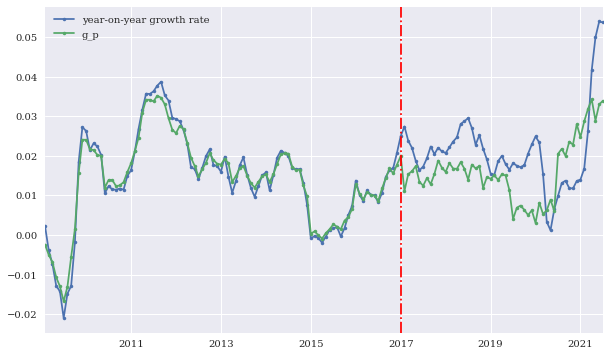

In [ ]:
inflation[['year-on-year growth rate','g_p']].loc['2009-02-01':].plot(figsize=(10,6),marker='.')
plt.axvline(seg2, color='r', linestyle='-.');

## XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=300,max_depth=6,subsample=0.6,colsample_bytree=0.8,learning_rate=0.1,random_state=0)

In [ ]:
model.fit(X_train,y_train)

XGBRegressor(colsample_bytree=0.8, max_depth=6, n_estimators=300,
             objective='reg:squarederror', subsample=0.6)

In [ ]:
y_predict = model.predict(X_train)
print('MSE:', np.square(np.subtract(y_train,y_predict)).mean())

MSE: 2.0120924594331378e-07


In [ ]:
y_tpred = model.predict(X_test)

In [ ]:
y_tpred = y_tpred[-y_test.shape[0]:] # 2022.05.01
print('MSE:', np.square(np.subtract(y_test,y_tpred)).mean())

MSE: 0.00011300860375473602


In [ ]:
y_p = np.concatenate([[np.nan],y_predict, y_tpred])
inflation['g_p'] = y_p

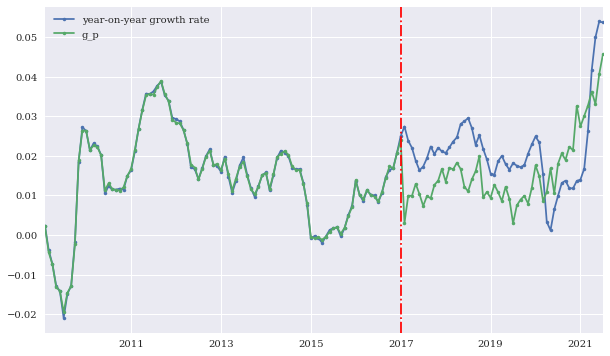

In [ ]:
inflation[['year-on-year growth rate','g_p']].loc['2009-02-01':].plot(figsize=(10,6),marker='.')
plt.axvline(seg2, color='r', linestyle='-.');

## MultiLayer Perceptron

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
model = MLPRegressor(solver='lbfgs',hidden_layer_sizes=(10,), random_state=123,max_iter=10000)

In [ ]:
model.fit(X_train,y_train)

MLPRegressor(hidden_layer_sizes=(10,), max_iter=10000, random_state=123,
             solver='lbfgs')

In [ ]:
y_predict = model.predict(X_train)
print('MSE:', np.square(np.subtract(y_train,y_predict)).mean())

MSE: 2.383843843916805e-05


In [ ]:
y_tpred = model.predict(X_test)

In [ ]:
y_tpred = y_tpred[-y_test.shape[0]:] # 2022.05.01
print('MSE:', np.square(np.subtract(y_test,y_tpred)).mean())

MSE: 0.00039807634526450175


In [ ]:
y_p = np.concatenate([[np.nan],y_predict, y_tpred])
inflation['g_p'] = y_p

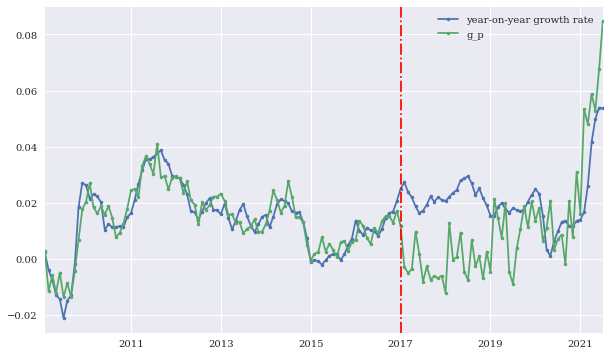

In [ ]:
inflation[['year-on-year growth rate','g_p']].loc['2009-02-01':].plot(figsize=(10,6),marker='.')
plt.axvline(seg2, color='r', linestyle='-.');

## LSTM

In [ ]:
import os
import random as rn
import tensorflow as tf
from tensorflow.keras import regularizers
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LSTM, Activation, BatchNormalization
from keras.utils.np_utils import to_categorical

In [ ]:
def set_my_seed():
  os.environ['PYTHONHASHSEED']='0'
  np.random.seed(1)
  rn.seed(12345)
  tf.random.set_seed(123)

In [ ]:
set_my_seed()

In [ ]:
X_train1 = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test1 = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(128,input_shape=(1,30)))
model.add(Dense(1))
model.add(Dropout(0.1))
model.add(Activation('tanh'))
model.compile(loss='mse',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               81408     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 81,537
Trainable params: 81,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train1,y_train,epochs=100,shuffle=False,verbose=2,batch_size=1)

Epoch 1/100
96/96 - 6s - loss: 0.0028 - 6s/epoch - 58ms/step
Epoch 2/100
96/96 - 0s - loss: 0.0046 - 223ms/epoch - 2ms/step
Epoch 3/100
96/96 - 0s - loss: 0.0189 - 210ms/epoch - 2ms/step
Epoch 4/100
96/96 - 0s - loss: 0.0123 - 218ms/epoch - 2ms/step
Epoch 5/100
96/96 - 0s - loss: 0.0070 - 213ms/epoch - 2ms/step
Epoch 6/100
96/96 - 0s - loss: 0.0078 - 208ms/epoch - 2ms/step
Epoch 7/100
96/96 - 0s - loss: 0.0022 - 224ms/epoch - 2ms/step
Epoch 8/100
96/96 - 0s - loss: 0.0035 - 219ms/epoch - 2ms/step
Epoch 9/100
96/96 - 0s - loss: 0.0013 - 208ms/epoch - 2ms/step
Epoch 10/100
96/96 - 0s - loss: 5.7218e-04 - 202ms/epoch - 2ms/step
Epoch 11/100
96/96 - 0s - loss: 4.8872e-04 - 215ms/epoch - 2ms/step
Epoch 12/100
96/96 - 0s - loss: 4.1850e-04 - 218ms/epoch - 2ms/step
Epoch 13/100
96/96 - 0s - loss: 2.7726e-04 - 215ms/epoch - 2ms/step
Epoch 14/100
96/96 - 0s - loss: 1.2615e-04 - 208ms/epoch - 2ms/step
Epoch 15/100
96/96 - 0s - loss: 1.5678e-04 - 210ms/epoch - 2ms/step
Epoch 16/100
96/96 - 0s - l

In [ ]:
y_predict = np.squeeze(model.predict(X_train1))
print('MSE:', np.square(np.subtract(y_train,y_predict)).mean())

MSE: 6.365179970335274e-05


In [ ]:
y_tpred = np.squeeze(model.predict(X_test1))

In [ ]:
y_tpred = y_tpred[-y_test.shape[0]:] # 2022.05.01
print('MSE:', np.square(np.subtract(y_test,y_tpred)).mean())

MSE: 0.00025180806669138154


In [ ]:
y_p = np.concatenate([[np.nan],y_predict, y_tpred])
inflation['g_p'] = y_p

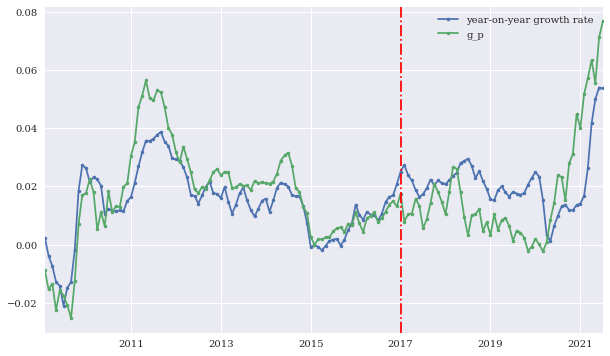

In [ ]:
inflation[['year-on-year growth rate','g_p']].loc['2009-02-01':].plot(figsize=(10,6),marker='.')
plt.axvline(seg2, color='r', linestyle='-.');

## Conclusion

LSTM has the lowest MSE

# Nowcasting

##Average and OLS

### SMA

In [ ]:
Xn = commodity.rolling(22).mean()
Xn.dropna(inplace=True)
Xn

,Gold-Open,Gold-High,Gold-Low,Gold-Close,Gold-Volume,Palladium-Open,Palladium-High,Palladium-Low,Palladium-Close,Palladium-Volume,...,Natural Gas-Open,Natural Gas-High,Natural Gas-Low,Natural Gas-Close,Natural Gas-Volume,US Wheat-Open,US Wheat-High,US Wheat-Low,US Wheat-Close,US Wheat-Volume
2009-02-02,863.090909,871.159091,852.468182,862.600000,3702.590909,190.000000,192.000000,190.000000,192.550000,2.0,...,5.077227,5.208591,4.911727,5.035364,52657.227273,588.875000,601.920455,575.352273,587.272727,32445.136364
2009-02-03,864.077273,872.604545,853.418182,863.200000,3766.454545,190.000000,192.000000,190.000000,192.550000,2.0,...,5.033591,5.146773,4.859773,4.969091,54091.681818,586.852273,599.852273,573.488636,584.613636,32397.954545
2009-02-04,864.900000,873.772727,855.690909,865.218182,3786.000000,190.000000,192.000000,190.000000,192.550000,2.0,...,4.969818,5.082136,4.798818,4.902045,55251.000000,584.238636,597.238636,570.875000,581.227273,33737.954545
2009-02-05,867.227273,876.354545,858.618182,867.409091,3815.863636,190.000000,192.000000,190.000000,192.550000,2.0,...,4.903636,5.014045,4.737227,4.841091,55834.363636,580.931818,593.715909,567.693182,577.511364,33420.909091
2009-02-06,869.613636,878.695455,861.881818,870.718182,3826.454545,190.000000,192.000000,190.000000,192.550000,2.0,...,4.843182,4.958000,4.679864,4.791182,56719.681818,577.318182,590.272727,565.170455,574.954545,33834.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-23,1842.409091,1856.102273,1832.772727,1848.143182,171331.772727,2324.781818,2373.675909,2272.979091,2328.960909,0.0,...,4.506364,4.688500,4.338409,4.484864,139762.772727,783.181818,798.340909,771.227273,787.181818,10455.181818
2022-02-24,1847.513636,1864.111364,1837.227273,1854.493182,180690.818182,2330.135000,2388.710909,2270.866364,2331.666364,0.0,...,4.518227,4.691409,4.338727,4.481636,127950.136364,787.977273,804.363636,775.886364,793.534091,10455.181818
2022-02-25,1852.681818,1869.752273,1841.709091,1858.638636,184798.045455,2333.009091,2390.257273,2270.594545,2333.211818,0.0,...,4.504864,4.675909,4.326091,4.463273,126046.181818,793.897727,811.306818,779.738636,797.250000,10455.181818
2022-02-27,1857.572727,1874.993182,1845.718182,1862.552273,189384.409091,2333.951364,2397.540455,2273.117273,2339.620909,0.0,...,4.489045,4.664182,4.316864,4.450500,124867.727273,801.204545,819.238636,783.420455,800.613636,10455.181818


In [ ]:
Xn_train = Xn.loc['2009-01':seg1]
Xn_test = Xn.loc[seg2:]

In [ ]:
scaler = StandardScaler()
scaler.fit(Xn_train)
Xn_train = scaler.transform(Xn_train)
scaler.fit(Xn_test)
Xn_test = scaler.transform(Xn_test)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
nowcasting_p = model.predict(Xn_train)
nowcasting_tp = model.predict(Xn_test)


In [ ]:
nowcasting = np.concatenate([nowcasting_p, nowcasting_tp])
Xn['nowcasting'] = nowcasting

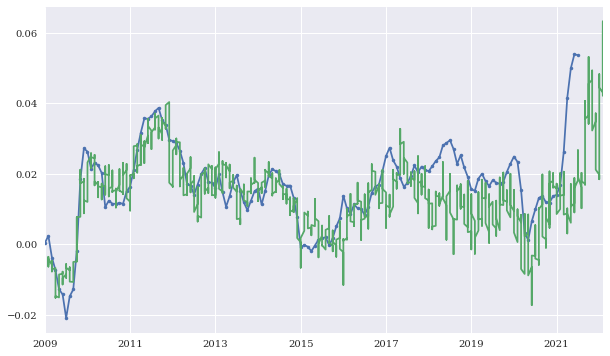

In [ ]:
inflation['year-on-year growth rate'].plot(figsize=(10,6), marker='.')
Xn['nowcasting'].plot(figsize=(10,6));

### EMA

In [ ]:
Xn = commodity.ewm(alpha=0.06,adjust=True,min_periods=22).mean()
Xn.dropna(inplace=True)
Xn

,Gold-Open,Gold-High,Gold-Low,Gold-Close,Gold-Volume,Palladium-Open,Palladium-High,Palladium-Low,Palladium-Close,Palladium-Volume,...,Natural Gas-Open,Natural Gas-High,Natural Gas-Low,Natural Gas-Close,Natural Gas-Volume,US Wheat-Open,US Wheat-High,US Wheat-Low,US Wheat-Close,US Wheat-Volume
2009-02-02,870.805558,879.625465,860.724307,871.778602,5843.211361,190.000000,192.000000,190.000000,192.550000,2.000000e+00,...,4.880611,5.011878,4.727274,4.847877,52814.914699,584.281560,596.940997,571.361988,582.340976,32475.769294
2009-02-03,873.366240,882.287335,863.022652,873.377043,5496.020371,190.000000,192.000000,190.000000,192.550000,2.000000e+00,...,4.857639,4.989439,4.698242,4.821406,54384.240894,582.500509,594.771869,569.752435,579.982138,31709.348131
2009-02-04,875.439965,884.374937,865.658258,875.566283,5105.766616,190.000000,192.000000,190.000000,192.550000,2.000000e+00,...,4.831992,4.968539,4.681623,4.803999,55431.875929,580.406092,592.229771,567.347591,577.055274,33433.303352
2009-02-05,877.792431,887.426055,868.611548,878.465600,4775.250357,190.000000,192.000000,190.000000,192.550000,2.000000e+00,...,4.816365,4.951269,4.668540,4.791650,56568.324874,577.497447,590.344617,565.377225,575.888551,33670.279850
2009-02-06,880.545965,889.756995,871.678702,881.123631,4442.100141,190.000000,192.000000,190.000000,192.550000,2.000000e+00,...,4.804261,4.942698,4.657548,4.790326,57443.323743,576.334941,588.856018,564.523788,574.471669,34728.913205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-23,1847.603107,1860.307770,1837.372406,1852.102961,144499.795008,2243.399128,2296.267131,2195.677482,2257.997124,3.172671e-26,...,4.372095,4.548375,4.238831,4.378982,112107.554429,786.982778,801.987174,775.737348,791.658302,10855.389165
2022-02-24,1851.460921,1867.279304,1839.846061,1856.554783,161212.687307,2257.746380,2321.227303,2202.778033,2267.778497,2.982310e-26,...,4.385949,4.571872,4.242082,4.390323,105593.501164,792.728811,809.427943,781.828107,799.718804,10204.065815
2022-02-25,1854.763265,1870.742546,1842.519298,1858.417496,165326.726069,2267.781598,2330.874865,2209.512551,2274.061787,2.803372e-26,...,4.397172,4.580520,4.252577,4.395104,106149.431094,800.560083,817.937267,785.408421,802.315676,9591.821866
2022-02-27,1857.867469,1873.997993,1845.032140,1860.168447,169193.922505,2273.074702,2344.202373,2218.301798,2286.508080,2.635169e-26,...,4.407722,4.588649,4.262442,4.399598,106672.005228,807.921478,825.936031,788.773916,804.756735,9016.312554


In [ ]:
Xn_train = Xn.loc['2009-01':seg1]
Xn_test = Xn.loc[seg2:]

In [ ]:
scaler = StandardScaler()
scaler.fit(Xn_train)
Xn_train = scaler.transform(Xn_train)
scaler.fit(Xn_test)
Xn_test = scaler.transform(Xn_test)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
nowcasting_p = model.predict(Xn_train)
nowcasting_tp = model.predict(Xn_test)

In [ ]:
nowcasting = np.concatenate([nowcasting_p, nowcasting_tp])
Xn['nowcasting'] = nowcasting

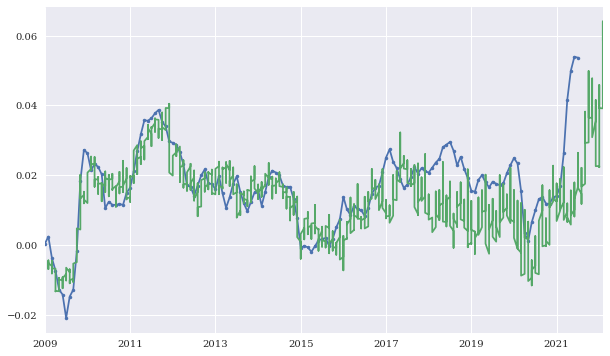

In [ ]:
inflation['year-on-year growth rate'].plot(figsize=(10,6), marker='.')
Xn['nowcasting'].plot(figsize=(10,6));

## LSTM

### LSTM Regression

In [ ]:
model = Sequential()
model.add(LSTM(128,input_shape=(1,30)))
model.add(Dense(1))
model.add(Dropout(0.1))
model.add(Activation('tanh'))
model.compile(loss='mse',optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               81408     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
 dropout_1 (Dropout)         (None, 1)                 0         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 81,537
Trainable params: 81,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
set_my_seed()

In [ ]:
model.fit(X_train1,y_train,epochs=100,shuffle=False,verbose=2,batch_size=1)

Epoch 1/100
96/96 - 1s - loss: 0.0025 - 1s/epoch - 15ms/step
Epoch 2/100
96/96 - 0s - loss: 0.0078 - 213ms/epoch - 2ms/step
Epoch 3/100
96/96 - 0s - loss: 0.0129 - 218ms/epoch - 2ms/step
Epoch 4/100
96/96 - 0s - loss: 0.0327 - 224ms/epoch - 2ms/step
Epoch 5/100
96/96 - 0s - loss: 0.0384 - 214ms/epoch - 2ms/step
Epoch 6/100
96/96 - 0s - loss: 0.0128 - 207ms/epoch - 2ms/step
Epoch 7/100
96/96 - 0s - loss: 0.0086 - 210ms/epoch - 2ms/step
Epoch 8/100
96/96 - 0s - loss: 0.0047 - 205ms/epoch - 2ms/step
Epoch 9/100
96/96 - 0s - loss: 0.0036 - 207ms/epoch - 2ms/step
Epoch 10/100
96/96 - 0s - loss: 0.0019 - 213ms/epoch - 2ms/step
Epoch 11/100
96/96 - 0s - loss: 0.0011 - 213ms/epoch - 2ms/step
Epoch 12/100
96/96 - 0s - loss: 6.6102e-04 - 208ms/epoch - 2ms/step
Epoch 13/100
96/96 - 0s - loss: 4.7454e-04 - 213ms/epoch - 2ms/step
Epoch 14/100
96/96 - 0s - loss: 1.7273e-04 - 213ms/epoch - 2ms/step
Epoch 15/100
96/96 - 0s - loss: 2.3365e-04 - 205ms/epoch - 2ms/step
Epoch 16/100
96/96 - 0s - loss: 9.8

In [ ]:
Xn_train1 = np.reshape(Xn_train,(Xn_train.shape[0],1,Xn_train.shape[1]))
Xn_test1 = np.reshape(Xn_test,(Xn_test.shape[0],1,Xn_test.shape[1]))

In [ ]:
nowcasting_p = model.predict(Xn_train1)
nowcasting_tp = model.predict(Xn_test1)

In [ ]:
nowcasting = np.concatenate([nowcasting_p, nowcasting_tp])
Xn['nowcasting'] = nowcasting

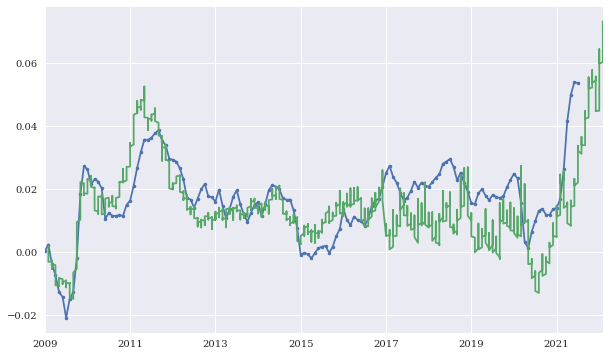

In [ ]:
inflation['year-on-year growth rate'].plot(figsize=(10,6), marker='.')
Xn['nowcasting'].plot(figsize=(10,6));

### Window Method
The results of the previous methods are too volatile.

# New Section

In [ ]:
commodity

,Gold-Open,Gold-High,Gold-Low,Gold-Close,Gold-Volume,Palladium-Open,Palladium-High,Palladium-Low,Palladium-Close,Palladium-Volume,...,Natural Gas-Open,Natural Gas-High,Natural Gas-Low,Natural Gas-Close,Natural Gas-Volume,US Wheat-Open,US Wheat-High,US Wheat-Low,US Wheat-Close,US Wheat-Volume
2009-01-02,881.5,881.5,868.9,878.8,46.0,190.00,192.00,190.00,192.55,2.0,...,5.550,6.088,5.503,5.971,41110.0,606.25,615.00,592.00,611.00,23818.0
2009-01-05,882.0,883.5,847.0,857.2,35.0,190.00,192.00,190.00,192.55,2.0,...,5.930,6.142,5.825,6.072,42385.0,613.00,619.50,596.25,616.75,24454.0
2009-01-06,855.1,867.6,840.0,865.4,113.0,190.00,192.00,190.00,192.55,2.0,...,6.083,6.240,5.865,5.983,57506.0,615.00,645.00,611.50,643.50,43517.0
2009-01-07,862.0,867.0,837.7,841.1,101.0,190.00,192.00,190.00,192.55,2.0,...,5.985,6.070,5.784,5.872,48756.0,641.50,646.25,609.50,613.25,38683.0
2009-01-08,837.9,861.0,837.9,853.9,255.0,190.00,192.00,190.00,192.55,2.0,...,5.849,6.004,5.550,5.583,74717.0,610.25,620.75,598.00,612.50,33950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-23,1901.2,1912.9,1891.1,1910.4,154843.0,2345.50,2485.50,2342.00,2484.50,0.0,...,4.504,4.704,4.452,4.623,47180.0,841.00,880.00,834.00,876.00,0.0
2022-02-24,1911.9,1976.5,1878.6,1926.3,423048.0,2482.52,2712.27,2314.02,2421.02,0.0,...,4.603,4.940,4.293,4.568,3540.0,882.75,926.00,877.25,926.00,0.0
2022-02-25,1906.5,1925.0,1884.4,1887.6,229780.0,2425.00,2482.02,2315.02,2372.50,0.0,...,4.573,4.716,4.417,4.470,114859.0,923.25,951.25,841.50,843.00,0.0
2022-02-27,1906.5,1925.0,1884.4,1887.6,229780.0,2356.00,2553.00,2356.00,2481.50,0.0,...,4.573,4.716,4.417,4.470,114859.0,923.25,951.25,841.50,843.00,0.0


In [ ]:
inflation

,CPI,year-on-year growth rate,g_p
2009-01-01,211.143,0.000298,NaN
2009-02-01,212.193,0.002362,-0.008765
2009-03-01,212.709,-0.003836,-0.015415
2009-04-01,213.240,-0.007369,-0.013436
2009-05-01,213.856,-0.012814,-0.022605
...,...,...,...
2021-03-01,264.877,0.026198,0.057146
2021-04-01,267.054,0.041597,0.063369
2021-05-01,269.195,0.049927,0.055432
2021-06-01,271.696,0.053915,0.071097
